In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn
from sklearn.datasets import make_moons

In [117]:
X, y = make_moons(n_samples=250, noise=0.2, random_state=42)

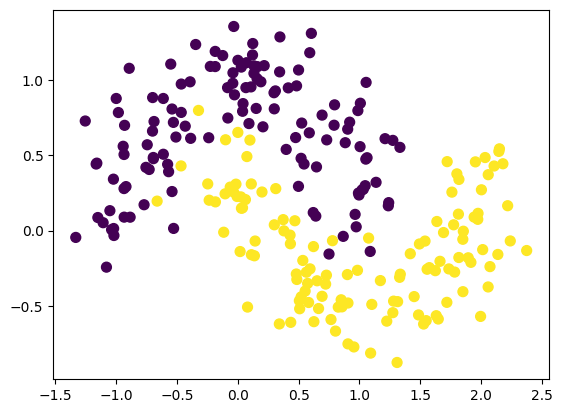

In [118]:
plt.scatter(X[:,0], X[:,1], c=y, s=50)
plt.show()

In [119]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [120]:
class Xavier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_stack = nn.Sequential(
            nn.Linear(in_features=2, out_features=10),
            nn.Tanh(),
            nn.Linear(in_features=10, out_features=10),
            nn.Tanh(),
            nn.Linear(in_features=10, out_features=10),
            nn.Tanh(),
            nn.Linear(in_features=10, out_features=10),
            nn.Tanh(),
            nn.Linear(in_features=10, out_features=1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.linear_stack(x)

model = Xavier().to(device)

In [121]:
model

Xavier(
  (linear_stack): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): Tanh()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): Tanh()
    (4): Linear(in_features=10, out_features=10, bias=True)
    (5): Tanh()
    (6): Linear(in_features=10, out_features=10, bias=True)
    (7): Tanh()
    (8): Linear(in_features=10, out_features=1, bias=True)
    (9): Sigmoid()
  )
)

In [122]:
model.state_dict()

OrderedDict([('linear_stack.0.weight',
              tensor([[ 0.1603, -0.3256],
                      [ 0.3086, -0.5367],
                      [-0.6344, -0.4199],
                      [-0.6727, -0.5696],
                      [-0.3753,  0.3084],
                      [-0.1271,  0.3501],
                      [-0.5966, -0.1380],
                      [ 0.3593, -0.1220],
                      [ 0.5151,  0.0045],
                      [ 0.1196,  0.1863]])),
             ('linear_stack.0.bias',
              tensor([-0.2184,  0.2322,  0.7032,  0.4804,  0.4029,  0.6941, -0.5597,  0.5172,
                       0.0756,  0.0973])),
             ('linear_stack.2.weight',
              tensor([[-0.3134, -0.1813, -0.0832,  0.1058, -0.0764,  0.0018,  0.2757, -0.0036,
                       -0.2532,  0.0535],
                      [-0.0750,  0.2054,  0.1032, -0.1059,  0.0611, -0.1387,  0.0553, -0.1567,
                       -0.1674, -0.0721],
                      [ 0.1019, -0.3160,  0.0199, -

In [123]:
total_params = sum(
	param.numel() for param in model.parameters()
)
total_params

371

In [124]:
model.linear_stack[0].weight = torch.nn.Parameter(torch.randn(10,2) * torch.sqrt(torch.tensor((1/2))))
model.linear_stack[0].bias = torch.nn.Parameter(torch.zeros_like(model.linear_stack[0].bias))

model.linear_stack[2].weight = torch.nn.Parameter(torch.randn(10,10) * torch.sqrt(torch.tensor((1/10))))
model.linear_stack[2].bias = torch.nn.Parameter(torch.zeros_like(model.linear_stack[2].bias))

model.linear_stack[4].weight = torch.nn.Parameter(torch.randn(10,10) * torch.sqrt(torch.tensor((1/10))))
model.linear_stack[4].bias = torch.nn.Parameter(torch.zeros_like(model.linear_stack[4].bias))

model.linear_stack[6].weight = torch.nn.Parameter(torch.randn(10,10) * torch.sqrt(torch.tensor((1/10))))
model.linear_stack[6].bias = torch.nn.Parameter(torch.zeros_like(model.linear_stack[6].bias))

model.linear_stack[8].weight = torch.nn.Parameter(torch.randn(1,10) * torch.sqrt(torch.tensor((1/10))))
model.linear_stack[8].bias = torch.nn.Parameter(torch.zeros_like(model.linear_stack[8].bias))

In [125]:
torch.randn(2,10) * torch.sqrt(torch.tensor((1/2)))

tensor([[ 0.7743,  0.0030,  0.3245,  0.2602, -0.4815, -0.0386, -0.5788,  0.4434,
          1.6115,  0.1537],
        [ 0.0586, -0.5185, -1.2129, -0.8418,  0.9769, -0.0706, -1.5003, -0.2778,
         -2.3191,  0.4288]])

In [126]:
torch.zeros(model.linear_stack[0].bias.shape)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [127]:
torch.zeros(model.linear_stack[2].bias.shape)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [128]:
model.state_dict()

OrderedDict([('linear_stack.0.weight',
              tensor([[-0.6178, -0.5483],
                      [-0.5614,  0.1308],
                      [ 0.9647,  0.6589],
                      [ 0.5964,  0.2561],
                      [-0.3826,  0.2318],
                      [-1.3272, -0.4982],
                      [-0.4088, -0.0406],
                      [ 0.0173,  0.9742],
                      [ 0.3073,  0.3305],
                      [-0.0716, -1.0713]])),
             ('linear_stack.0.bias',
              tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])),
             ('linear_stack.2.weight',
              tensor([[ 0.4240,  0.2449, -0.4945,  0.0160, -0.7489, -0.2336, -0.6347,  0.2726,
                       -0.1888, -0.0142],
                      [ 0.1867, -0.1665,  0.3139, -0.3042,  0.1525, -0.4384, -0.7335, -0.0742,
                       -0.5480,  0.1471],
                      [ 0.4113,  0.1334, -0.3380,  0.0177,  0.5752, -0.2677,  0.5151,  0.1665,
                       -0.14

In [129]:
# loss_fc and optimizer
loss_fc = nn.BCELoss() 

optimizer = torch.optim.Adam(params = model.parameters(),
                            lr = 0.001)

In [130]:
# turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [131]:
# building a training and evaluation loop

epochs = 100

for epoch in range(epochs):

  model.train()

  # forward pass
  y_logits = model(X).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # calculate the loss/accuarcy
  loss = loss_fc(y_logits, y)

  # optimizer zero grad
  optimizer.zero_grad()

  # backpropagation
  loss.backward()

  # optimizer step (perform gradient descent)
  optimizer.step()

  # testing
  model.eval()
  with torch.inference_mode():

    # forward pass
    test_logits = model(X).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # calculate the loss/accuarcy
    test_loss = loss_fc(test_logits, y)


# lets print out what is happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}")

Epoch: 0 | Loss: 0.62101
Epoch: 10 | Loss: 0.57230
Epoch: 20 | Loss: 0.53278
Epoch: 30 | Loss: 0.49782
Epoch: 40 | Loss: 0.46653
Epoch: 50 | Loss: 0.43946
Epoch: 60 | Loss: 0.41666
Epoch: 70 | Loss: 0.39818
Epoch: 80 | Loss: 0.38367
Epoch: 90 | Loss: 0.37254


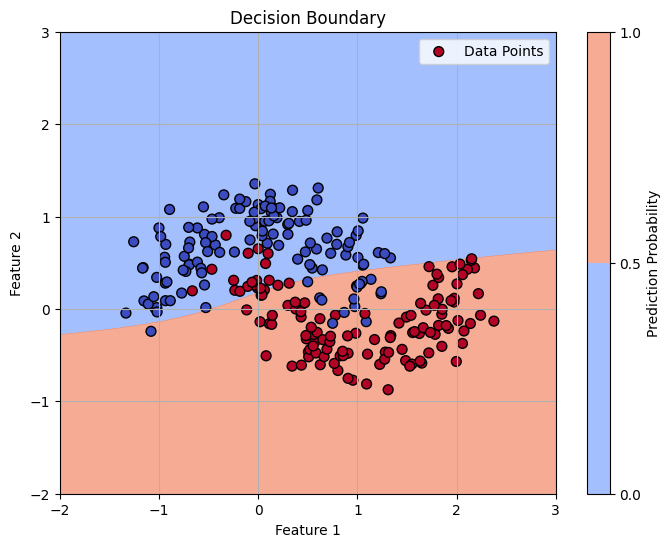

In [132]:
# 1. Generate a grid of points
x1_range = np.linspace(-2.0, 3.0, 200)
x2_range = np.linspace(-2.0, 3.0, 200)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
grid = np.c_[x1_grid.ravel(), x2_grid.ravel()]
grid_tensor = torch.tensor(grid, dtype=torch.float32)

# 2. Predict probabilities for the grid points
with torch.no_grad():
    grid_preds = model(grid_tensor).numpy()

# 3. Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(x1_grid, x2_grid, grid_preds.reshape(x1_grid.shape), levels=[0, 0.5, 1], alpha=0.8, cmap='coolwarm')
plt.colorbar(label='Prediction Probability')

# 4. Overlay the data points
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolor='k', cmap='coolwarm', s=50, label='Data Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.legend()
plt.grid()
plt.show()

- As we can see above by applying the xavier/glorat (Normal) technique the performance improves